In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
data=pd.read_csv("agricultural_yield.csv")
df=pd.DataFrame(data)
df.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
print(df.columns)

Index(['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare',
       'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule',
       'Yield_kg_per_hectare'],
      dtype='object')


In [5]:
X=df[['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare','Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']]
y=df['Yield_kg_per_hectare'].values

In [6]:
X.shape[1]

6

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [9]:
model=Sequential([
    Dense(64,activation="relu",input_shape=(x_train.shape[1],)),
    Dense(32,activation="relu"),
    Dense(1),
])

c:\Users\jadit\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',loss="mse",metrics=['mae'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history=model.fit(x_train,y_train,batch_size=32,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2665.2905 - mae: 41.2789 - val_loss: 2660.6533 - val_mae: 41.8027
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2725.2278 - mae: 41.7443 - val_loss: 2649.0771 - val_mae: 41.7502
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2718.4441 - mae: 41.1628 - val_loss: 2652.3582 - val_mae: 41.7939
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2689.3921 - mae: 40.9286 - val_loss: 2663.5522 - val_mae: 41.9518
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2684.8711 - mae: 41.4791 - val_loss: 2692.7410 - val_mae: 42.3551
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2678.4634 - mae: 41.5891 - val_loss: 2679.3088 - val_mae: 42.1639
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2847.0935 - mae: 42.2177 - val_loss: 2676.1355 - val_mae: 42.0290
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2638.8379 - mae: 40.9303 - val_loss: 2652.1455 - val_mae: 41.8487
Epoch 9/

In [15]:
test_loss , test_mae=model.evaluate(x_test,y_test,verbose=1)
print(f"Test Meam Absolute error {test_mae:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2576.7637 - mae: 41.3606
Test Meam Absolute error 39.60


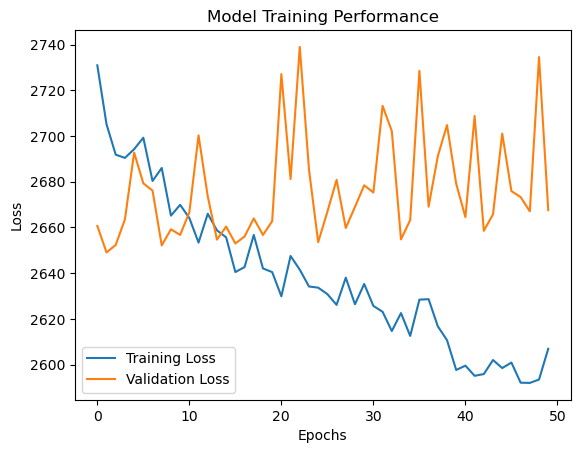

In [17]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Performance")
plt.legend()
plt.show()